# Assignment 2
CSED490W Introduction to Deep Learning 

Due : 11:59 pm November 6, 2019

October 27, 2019

@ Student Name: Chuanbo HUA

@ Student Number: 49003366

**NB.**
- Some comments just appear at the first time of such code appearing, so after that, I omitted some comments to make the code cleaner. 

**Questions:**

1. <a href="#1">(10) Loading the target dataset: Implement a Pytorch dataloader for the target dataset. Use 1/6 of the training dataset as a validation set, i.e., train : val : test = 5 : 1 : 1.</a>
2. (30) Implementing a baseline model: Implement a simple 2-layer (1-hidden layer) MLP and report the test accuracy on the MNIST dataset. • <a href="#2.1">(15) Plot the training curve (i.e., the loss or error values on the training set over iterations) to tune the learning rate; decrease the rate if the loss explodes or reaches a plateau, and increase the rate if the loss decreases too slowly.</a> • <a href="#2.2">(15) Plot the validation curve (i.e., the loss or error values on the validation set over iterations) to check under/over-ﬁtting. In training the model with the best learning rate found above, do early stopping to choose the best model (Algorithm 7.1 in the book).</a>
3. <a href="#3">(40) Improving performance : Implement an MLP that achieves the test accuracy above 97% by your own design; you may vary the number and size of layers, activation function, parameter initialization, loss function, optimizer, L1/L2 regularizer, dropout, and so on. (But, do not use data augmentation and ensemble methods.) Plot training/validation curves and use early stopping as before.</a>
4. (60) More regularization: Implement the following on top of your best model obtained above. (Chapter 7.) • <a href="#4.1">(20) Use data augmentation (by color jittering, image warping, image cropping etc..). Visualize some examples of augmented images. </a>• <a href="#4.2">(20) Implement the second-round training algorithms for reusing the validation set (Algorithms 7.2 and 7.3 in the book) and compare the training curve together with the ﬁrst-round training curve. </a>• <a href="#4.2">(20) Implement ensemble methods using ﬁve models: (a) bootstrap aggregating (bagging) (chapter 7.11 on the book) and (2) model averaging with diﬀerent random initialization. For each of (a) and (b), report test accuracy of individual models as well as that of the ensemble model.</a>
5. <a href="#5">(10) Comparing GPU vs. CPU : Measure GPU training/testing time and compare it to CPU training/testing time.</a>


## Question 1
>  <a name="1">Loading the target dataset: Implement a Pytorch dataloader for the target dataset. Use 1/6 of the training dataset as a validation set, i.e., train : val : test = 5 : 1 : 1.</a>

By using `torch.utils.data.random_split` function to split original train set to train set and verify set and set the size to 50000 and 10000. 

Then we should define three data loaders for train, verity and test. 

In [0]:
import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
import numpy as np

batch_size = 100

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=torchvision.transforms.ToTensor())
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=torchvision.transforms.ToTensor())

mnist_trainset, mnist_verifyset = torch.utils.data.random_split(mnist_trainset, [50000, 10000])

train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=batch_size, shuffle=True)
verify_loader = torch.utils.data.DataLoader(mnist_verifyset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=batch_size, shuffle=True)

## Question 2.1
>  <a name="2.1">Plot the training curve (i.e., the loss or error values on the training set over iterations) to tune the learning rate; decrease the rate if the loss explodes or reaches a plateau, and increase the rate if the loss decreases too slowly. </a>

After Implementing a simple 2-layer MLP, I tried several different learning rates, including: 0.005, 0.01, 0.02, 0.05, 0.1, 0.5, and then comparing such results to get the best(better) learning rate. 

For each learning rate, I chose to run 5 rounds and output the accurancy every 100 data, then comparing the increasing rate to get a result. Here are some results: 

**Learning rate = 0.005 :**

| Training data (*100) | Accuracy | Training data (*100) | Accuracy |
| -------------------- | -------- | -------------------- | -------- |
| 100                  |     0.12     | 1400                |     0.9     |
| 200                  |     0.74     | 1500                |     0.9     |
| 300                  |     0.89     | 1600                |     0.91     |
| 400                  |     0.87     | 1700                |     0.96     |
| 500                  |     0.9     | 1800                |     0.91     |
| 600                  |     0.88     | 1900                |    0.94      |
| 700                  |     0.92     | 2000                |    0.91      |
| 800                  |     0.91     | 2100                |    0.94      |
| 900                  |     0.88     | 2200                |    0.9      |
| 1000                |     0.94     | 2300                |   0.95       |
| 1100                |     0.89     | 2400                |   0.93       |
| 1200                |     0.92     | 2500                |   0.94       |
| 1300                |     0.94     |                      |              |

**Learning rate = 0.1 :**

| Training data (*100) | Accuracy | Training data (*100) | Accuracy |
| -------------------- | -------- | -------------------- | -------- |
| 100 | 0.14 | 1400 | 0.93 |
| 200 | 0.8 | 1500 | 0.96 |
| 300 | 0.87 | 1600 | 0.91 |
| 400 | 0.9 | 1700 | 0.94 |
| 500 | 0.89 | 1800 | 0.98 |
| 600 | 0.89 | 1900 | 0.99 |
| 700 | 0.96 | 2000 | 0.96 |
| 800 | 0.95 | 2100 | 0.95 |
| 900 | 0.88 | 2200 | 0.96 |
| 1000 | 0.95 | 2300 | 0.95 |
| 1100 | 0.9 | 2400 | 0.96 |
| 1200 | 0.94 | 2500 | 0.94 |
| 1300 | 0.91 |

As a result, I chose 0.1 as the learning rate, since the speed of accuracy increasing and the fluctuation of final accuracy were better than 0.05 and 0.5. 

The plot of accuracy in learning rate = 0.1 is as following. 

**NB. There is a problem that even though I set it a really small learning rate, the curve of loss is still intensively fluctuating. Comparing with different result, I finally chose 0.1 as the learning rate.**

The graph of Accuarcy on Training Set: 


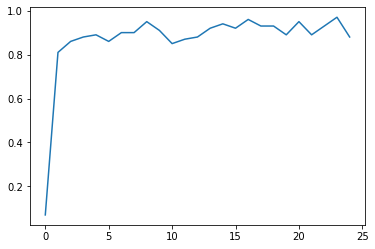

The graph of loss: 


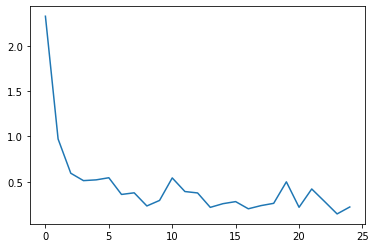

In [86]:
import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt

batch_size = 100

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=torchvision.transforms.ToTensor())
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=torchvision.transforms.ToTensor())

mnist_trainset, mnist_verifyset = torch.utils.data.random_split(mnist_trainset, [50000, 10000])

train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=batch_size, shuffle=True)
verify_loader = torch.utils.data.DataLoader(mnist_verifyset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=batch_size, shuffle=True)

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = MLP()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
loss_function = nn.CrossEntropyLoss()

def AccuarcyCompute(pred,label):
    pred = pred.cpu().data.numpy()
    label = label.cpu().data.numpy()
    test_np = (np.argmax(pred,1) == label)
    test_np = np.float32(test_np)
    return np.mean(test_np)

plot = []
plot_loss = []

for x in range(5):
  for i, data in enumerate(train_loader):
    optimizer.zero_grad()

    (inputs, labels) = data
    inputs = torch.autograd.Variable(inputs)
    labels = torch.autograd.Variable(labels)

    outputs = model(inputs)

    loss = loss_function(outputs, labels)
    loss.backward()

    optimizer.step()

    if i % 100 == 0:
      plot.append(AccuarcyCompute(outputs, labels))
      plot_loss.append(loss)

print("The graph of Accuarcy on Training Set: ")
x = range(len(plot))
plt.plot(x, plot)
plt.show()

print("The graph of loss: ")
x = range(len(plot_loss))
plt.plot(x, plot_loss)
plt.show()


## Question 2.2
>  <a name="2.2">Plot the validation curve (i.e., the loss or error values on the validation set over iterations) to check under/over-ﬁtting. In training the model with the best learning rate found above, do early stopping to choose the best model (Algorithm 7.1 in the book).</a>

After setting the learning rate 0.1, I started to train for 30 round and record each round's accuracy on **verify set** and parameters. 

By using the **early stop method**, finally I chose a better rounds number: about 15. 

The graph about accuracy of verify data set and training time is as following: 

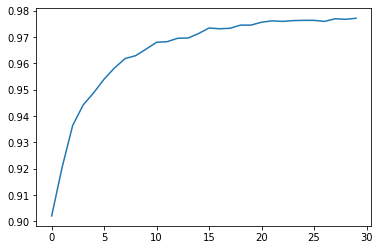

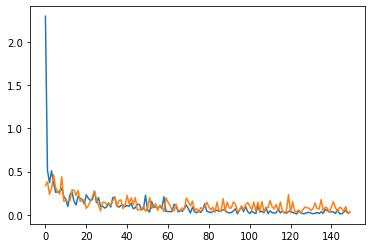

In [71]:
import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
import numpy as np

batch_size = 100

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=torchvision.transforms.ToTensor())
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=torchvision.transforms.ToTensor())

mnist_trainset, mnist_verifyset = torch.utils.data.random_split(mnist_trainset, [50000, 10000])

train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=batch_size, shuffle=True)
verify_loader = torch.utils.data.DataLoader(mnist_verifyset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=batch_size, shuffle=True)

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = MLP()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
loss_function = nn.CrossEntropyLoss()

def AccuarcyCompute(pred,label):
    pred = pred.cpu().data.numpy()
    label = label.cpu().data.numpy()
    test_np = (np.argmax(pred,1) == label)
    test_np = np.float32(test_np)
    return np.mean(test_np)

plot = []
plot_loss_train = []
plot_loss_verify = []

for x in range(30):
  accuracy_list = []
  for i, data in enumerate(train_loader):
    optimizer.zero_grad()

    (inputs, labels) = data
    inputs = torch.autograd.Variable(inputs)
    labels = torch.autograd.Variable(labels)

    outputs = model(inputs)

    loss = loss_function(outputs, labels)
    loss.backward()

    optimizer.step()

    if i % 100 == 0:
      plot_loss_train.append(loss)

  for i, data in enumerate(verify_loader):
    (inputs, labels) = data
    inputs = torch.autograd.Variable(inputs)
    labels = torch.autograd.Variable(labels)
    outputs = model(inputs)
    if i % 20 == 0:
      plot_loss_verify.append(loss_function(outputs, labels))
    accuracy_list.append(AccuarcyCompute(outputs,labels))
  
  torch.save(model.state_dict(), 'params.pkl')
  plot.append(sum(accuracy_list) / len(accuracy_list))

print("The graph of Accuarcy on Verify Set: ")
x = range(len(plot))
plt.plot(x, plot)
plt.show()

print("The graph of loss: ")
x = range(len(plot_loss_train))
plt.plot(x, plot_loss_train)
x = range(len(plot_loss_verify))
plt.plot(x, plot_loss_verify)
plt.show()

## Question 3
><a name="3">Improving performance : Implement an MLP that achieves the test accuracy above 97% by your own design; you may vary the number and size of layers, activation function, parameter initialization, loss function, optimizer, L1/L2 regularizer, dropout, and so on. (But, do not use data augmentation and ensemble methods.) Plot training/validation curves and use early stopping as before.</a>

To complete this accuracy rate, I used (What's new today):

- Add another linear layer
- Add Momentum Metod in optim

And finally, the accuracy rate reached about: 0.98

In [72]:
import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
import numpy as np

batch_size = 100

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=torchvision.transforms.ToTensor())
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=torchvision.transforms.ToTensor())

mnist_trainset, mnist_verifyset = torch.utils.data.random_split(mnist_trainset, [50000, 10000])

train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=batch_size, shuffle=True)
verify_loader = torch.utils.data.DataLoader(mnist_verifyset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=batch_size, shuffle=True)

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = MLP()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
loss_function = nn.CrossEntropyLoss()

def AccuarcyCompute(pred,label):
    pred = pred.data.numpy()
    label = label.data.numpy()
    test_np = (np.argmax(pred,1) == label)
    test_np = np.float32(test_np)
    return np.mean(test_np)

for x in range(15):
  accuarcy_list = []
  for i, data in enumerate(train_loader):
    optimizer.zero_grad()

    (inputs, labels) = data
    inputs = torch.autograd.Variable(inputs)
    labels = torch.autograd.Variable(labels)

    outputs = model(inputs)

    loss = loss_function(outputs, labels)
    loss.backward()

    optimizer.step()

  for i, data in enumerate(verify_loader):
    (inputs, labels) = data
    inputs = torch.autograd.Variable(inputs)
    labels = torch.autograd.Variable(labels)
    outputs = model(inputs)
    accuarcy_list.append(AccuarcyCompute(outputs,labels))
  
  print("Verify Accuarcy : ", sum(accuarcy_list) / len(accuarcy_list))

for i, data in enumerate(test_loader):
  (inputs, labels) = data
  inputs = torch.autograd.Variable(inputs)
  labels = torch.autograd.Variable(labels)
  outputs = model(inputs)
  accuarcy_list.append(AccuarcyCompute(outputs,labels))
  
print("Test Accuarcy : ", sum(accuarcy_list) / len(accuarcy_list))

Verify Accuarcy :  0.9594000053405761
Verify Accuarcy :  0.9740000116825104
Verify Accuarcy :  0.9734000098705292
Verify Accuarcy :  0.9766000097990036
Verify Accuarcy :  0.9741000080108643
Verify Accuarcy :  0.9785000085830688
Verify Accuarcy :  0.9779000091552734
Verify Accuarcy :  0.9763000112771988
Verify Accuarcy :  0.980500010251999
Verify Accuarcy :  0.9807000112533569
Verify Accuarcy :  0.9800000095367432
Verify Accuarcy :  0.9791000092029571
Verify Accuarcy :  0.9807000112533569
Verify Accuarcy :  0.9809000116586685
Verify Accuarcy :  0.9815000116825103
Test Accuarcy :  0.9819500112533569


## Question 4.1

><a name="4.1">Use data augmentation (by color jittering, image warping, image cropping etc..). Visualize some examples of augmented images.</a>

I chose to complete this by transforming the image to numpy and operating then. And here are two examples: 1. flip; 2. translation; 3. noise;

At translation part, we can also transort the image to other directions, at here, right is only an example. 

**NB.** I believe in this case, we can not flip an image, since some number will be changed by flipping, such as 5 and 2, so here is also just an example. 

I tried three methods about data augmentation, many other methods about this can also be completed in this way. 

Original image: 



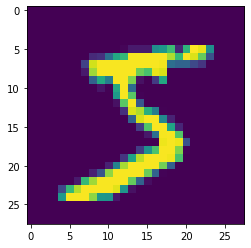

Flip example: 



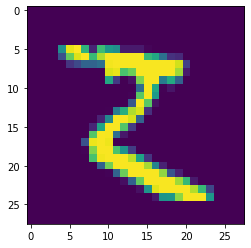

Translation example: 



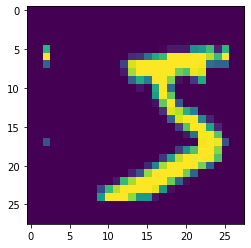

Noisy example: 



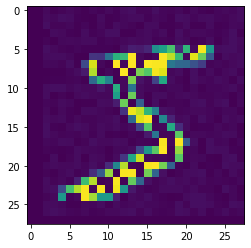

In [84]:
import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt
import random

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True)
img = np.array(mnist_trainset[0][0])

print("Original image: \n")
plt.imshow(img)
plt.show()

print("Flip example: \n")
flip_img = np.fliplr(img)
plt.imshow(flip_img)
plt.show()

print("Translation example: \n")
HEIGHT = 27
WIDTH = 27
for i in range(HEIGHT, 1, -1):
  for j in range(WIDTH):
    if (i < HEIGHT - 1):
      img[j][i] = img[j][i-5]
    elif (i < HEIGHT - 5):
      img[j][i] = 0
plt.imshow(img)
plt.show()

print("Noisy example: \n")
img = np.array(mnist_trainset[0][0])
HEIGHT = 27
WIDTH = 27
for i in range(HEIGHT, 1, -1):
  for j in range(WIDTH):
    img[j][i] += random.randint(0,9)
plt.imshow(img)
plt.show()

## Question 4.2
> <a name="4.2">Implement the second-round training algorithms for reusing the validation set (Algorithms 7.2 and 7.3 in the book) and compare the training curve together with the ﬁrst-round training curve.</a>

Actually, the split method I used was `random_split`, so to well use the verify set, I can just repeat the spliting and training to get a result. 

As shown in the result, the accuracy has improved a lot, from 0.981 (first-round training) to 0.987 (second-round training). 

The graph about two rounds results is as following. 

1
1
1
1
1
Verify Accuarcy :  0.9577000015974044
1
1
1
1
1
Verify Accuarcy :  0.9717000091075897
2
2
2
2
2
Verify Accuarcy :  0.9795000106096268
2
2
2
2
2
Verify Accuarcy :  0.9766000092029572
[tensor(2.3170, grad_fn=<NllLossBackward>), tensor(0.2730, grad_fn=<NllLossBackward>), tensor(0.1000, grad_fn=<NllLossBackward>), tensor(0.2549, grad_fn=<NllLossBackward>), tensor(0.1821, grad_fn=<NllLossBackward>), tensor(0.1203, grad_fn=<NllLossBackward>), tensor(0.1141, grad_fn=<NllLossBackward>), tensor(0.0758, grad_fn=<NllLossBackward>), tensor(0.0509, grad_fn=<NllLossBackward>), tensor(0.1534, grad_fn=<NllLossBackward>)]
[tensor(0.1203, grad_fn=<NllLossBackward>), tensor(0.0253, grad_fn=<NllLossBackward>), tensor(0.0766, grad_fn=<NllLossBackward>), tensor(0.0345, grad_fn=<NllLossBackward>), tensor(0.0623, grad_fn=<NllLossBackward>), tensor(0.0172, grad_fn=<NllLossBackward>), tensor(0.0258, grad_fn=<NllLossBackward>), tensor(0.0464, grad_fn=<NllLossBackward>), tensor(0.1190, grad_fn=<NllLossB

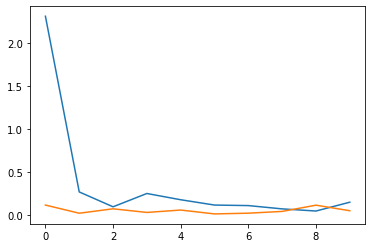

Test Accuarcy :  0.9751500082015991


In [91]:
import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
import numpy as np

batch_size = 100

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = MLP()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
loss_function = nn.CrossEntropyLoss()

def AccuarcyCompute(pred,label):
    pred = pred.data.numpy()
    label = label.data.numpy()
    test_np = (np.argmax(pred,1) == label)
    test_np = np.float32(test_np)
    return np.mean(test_np)

plot1 = []
plot2 = []
for round in range(2):
  mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=torchvision.transforms.ToTensor())
  mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=torchvision.transforms.ToTensor())

  mnist_trainset, mnist_verifyset = torch.utils.data.random_split(mnist_trainset, [50000, 10000])

  train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=batch_size, shuffle=True)
  verify_loader = torch.utils.data.DataLoader(mnist_verifyset, batch_size=batch_size, shuffle=True)
  test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=batch_size, shuffle=True)

  for x in range(7):
    accuarcy_list = []
    for i, data in enumerate(train_loader):
      optimizer.zero_grad()

      (inputs, labels) = data
      inputs = torch.autograd.Variable(inputs)
      labels = torch.autograd.Variable(labels)

      outputs = model(inputs)

      loss = loss_function(outputs, labels)
      loss.backward()
      if (i % 100 == 0) & (round == 0):
        plot1.append(loss)
        print("1")
      elif (i % 100 == 0) & (round == 1):
        plot2.append(loss)
        print("2")

      optimizer.step()

    for i, data in enumerate(verify_loader):
      (inputs, labels) = data
      inputs = torch.autograd.Variable(inputs)
      labels = torch.autograd.Variable(labels)
      outputs = model(inputs)
      accuarcy_list.append(AccuarcyCompute(outputs,labels))
    
    print("Verify Accuarcy : ", sum(accuarcy_list) / len(accuarcy_list))

print(plot1)
print(plot2)
print("The graph of Training loss:")
x = range(len(plot1))
plt.plot(x, plot1)
x = range(len(plot2))
plt.plot(x, plot2)
plt.show()

for i, data in enumerate(test_loader):
  (inputs, labels) = data
  inputs = torch.autograd.Variable(inputs)
  labels = torch.autograd.Variable(labels)
  outputs = model(inputs)
  accuarcy_list.append(AccuarcyCompute(outputs,labels))
  
print("Test Accuarcy : ", sum(accuarcy_list) / len(accuarcy_list))

## Question 5

> <a name="5">Comparing GPU vs. CPU : Measure GPU training/testing time and compare it to CPU training/testing time</a>

By changing the running method in `Edit` - `Notebook Setting` for CPU and GPU and using function of `time.clock()`, I got such results: 

**GPU** running time: 176.28834 s

**CPU** running time: 134.30852 s

It is interesting in this occation, CPU is faster than GPU. 

In [92]:
import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
import numpy as np
import time

start = time.clock()

batch_size = 100

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=torchvision.transforms.ToTensor())
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=torchvision.transforms.ToTensor())

mnist_trainset, mnist_verifyset = torch.utils.data.random_split(mnist_trainset, [50000, 10000])

train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=batch_size, shuffle=True)
verify_loader = torch.utils.data.DataLoader(mnist_verifyset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=batch_size, shuffle=True)

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = MLP()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
loss_function = nn.CrossEntropyLoss()

def AccuarcyCompute(pred,label):
    pred = pred.data.numpy()
    label = label.data.numpy()
    test_np = (np.argmax(pred,1) == label)
    test_np = np.float32(test_np)
    return np.mean(test_np)

for x in range(15):
  accuarcy_list = []
  for i, data in enumerate(train_loader):
    optimizer.zero_grad()

    (inputs, labels) = data
    inputs = torch.autograd.Variable(inputs)
    labels = torch.autograd.Variable(labels)

    outputs = model(inputs)

    loss = loss_function(outputs, labels)
    loss.backward()

    optimizer.step()

  for i, data in enumerate(verify_loader):
    (inputs, labels) = data
    inputs = torch.autograd.Variable(inputs)
    labels = torch.autograd.Variable(labels)
    outputs = model(inputs)
    accuarcy_list.append(AccuarcyCompute(outputs,labels))
  
  print("Verify Accuarcy : ", sum(accuarcy_list) / len(accuarcy_list))

for i, data in enumerate(test_loader):
  (inputs, labels) = data
  inputs = torch.autograd.Variable(inputs)
  labels = torch.autograd.Variable(labels)
  outputs = model(inputs)
  accuarcy_list.append(AccuarcyCompute(outputs,labels))
  
print("Test Accuarcy : ", sum(accuarcy_list) / len(accuarcy_list))

elapsed = (time.clock() - start)
print("Time used:",elapsed)

Verify Accuarcy :  0.9549000018835068
Verify Accuarcy :  0.9635000044107437
Verify Accuarcy :  0.973200010061264
Verify Accuarcy :  0.9757000076770782
Verify Accuarcy :  0.9730000102519989
Verify Accuarcy :  0.9789000099897385
Verify Accuarcy :  0.9776000100374221
Verify Accuarcy :  0.9810000103712082
Verify Accuarcy :  0.9754000091552735
Verify Accuarcy :  0.9758000105619431
Verify Accuarcy :  0.9767000102996826
Verify Accuarcy :  0.9768000102043152
Verify Accuarcy :  0.9816000133752822
Verify Accuarcy :  0.9785000079870224
Verify Accuarcy :  0.9816000109910965
Test Accuarcy :  0.9818500113487244
Time used: 134.30852200000027
